In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.font_manager as fm

In [2]:
# 读取附件1至附件4的数据
# 附件1-4为原版赛题文件 因文件字节限制故为放至压缩包内
original_1 = pd.read_excel('附件1.xlsx')
original_2 = pd.read_excel('附件2.xlsx')
original_3 = pd.read_excel('附件3.xlsx')
original_4 = pd.read_excel('附件4.xlsx')

In [3]:
# 合并data_1和data_2
merged_data = pd.merge(original_1, original_2, on='单品编码', how='outer')

merged_data['销售日期'] = pd.to_datetime(merged_data['销售日期'])
merged_data['销售月份'] = merged_data['销售日期'].dt.to_period('M')


In [5]:
# 按照单品名称进行分组，计算每个单品的销售量
sales_by_Single = merged_data.groupby('单品名称')['销量(千克)'].sum()
# 按照分类名称进行分组，计算每个单品的销售量
sales_by_Catagory = merged_data.groupby('分类名称')['销量(千克)'].sum()

In [6]:
# 按照时间顺序排序
merged_data.sort_values('销售日期', inplace=True)

# 按照单品名称和日期进行分组，计算销售总量
sales_by_Single_and_Date = merged_data.groupby(['单品名称', '销售日期'])['销量(千克)'].sum()

# 重塑数据，按照时间顺序排序
sales_by_Single_and_Date = sales_by_Single_and_Date.unstack('单品名称')
sales_by_Single_and_Date.sort_index(axis=1, inplace=True)
sales_by_Single_and_Date = sales_by_Single_and_Date.fillna(0)
# 导出到Excel
sales_by_Single_and_Date.to_excel('./results/销售量按单品-日统计.xlsx')


In [7]:
# 按照时间顺序排序
merged_data.sort_values('销售月份', inplace=True)

# 按照单品名称和月份进行分组，计算销售总量
sales_by_Single_and_Month = merged_data.groupby(['单品名称', '销售月份'])['销量(千克)'].sum()

# 重塑数据，按照时间顺序排序
sales_by_Single_and_Month = sales_by_Single_and_Month.unstack('单品名称')
sales_by_Single_and_Month.sort_index(axis=1, inplace=True)
sales_by_Single_and_Month = sales_by_Single_and_Month.fillna(0)

# 导出到Excel
sales_by_Single_and_Month.to_excel('./results/销售量按单品-月统计.xlsx')

In [8]:
# 按照时间顺序排序
merged_data.sort_values('销售日期', inplace=True)

# 按照品类名称和日期进行分组，计算销售总量
sales_by_Catagory_and_Date = merged_data.groupby(['分类名称', '销售日期'])['销量(千克)'].sum()

# 重塑数据，按照时间顺序排序
sales_by_Catagory_and_Date = sales_by_Catagory_and_Date.unstack('分类名称')
sales_by_Catagory_and_Date.sort_index(axis=1, inplace=True)
sales_by_Catagory_and_Date = sales_by_Catagory_and_Date.fillna(0)

# 导出到Excel
sales_by_Catagory_and_Date.to_excel('./results/销售量按分类-日统计.xlsx')

In [9]:
# 按照时间顺序排序
merged_data.sort_values('销售日期', inplace=True)

# 按照品类名称和月份进行分组，计算销售总量
sales_by_Catagory_and_Month = merged_data.groupby(['分类名称', '销售月份'])['销量(千克)'].sum()

# 重塑数据，按照时间顺序排序
sales_by_Catagory_and_Month = sales_by_Catagory_and_Month.unstack('分类名称')
sales_by_Catagory_and_Month.sort_index(axis=1, inplace=True)
sales_by_Catagory_and_Month = sales_by_Catagory_and_Month.fillna(0)
# 导出到Excel
sales_by_Catagory_and_Month.to_excel('./results/销售量按分类-月统计.xlsx')

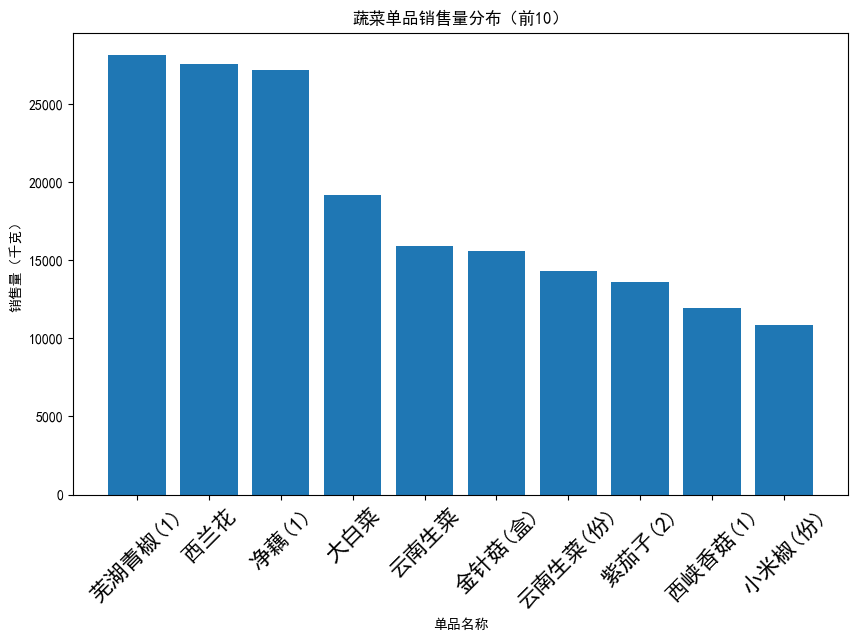

In [10]:
import matplotlib.pyplot as plt
import matplotlib

# 指定中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']

# 设置图形的大小为10x6英寸
plt.figure(figsize=(10, 6))

# 只选择销量前10的数据
top20_sales = sales_by_Single.nlargest(10)

# 绘制柱状图
plt.bar(top20_sales.index, top20_sales.values)

# 设置x轴标签的字体样式，并将标签旋转45度
plt.xticks(rotation=45, size=16)

# 设置x轴标签的文字内容以及字体样式
plt.xlabel('单品名称')

# 设置y轴标签的文字内容以及字体样式
plt.ylabel('销售量（千克）')

# 设置图形的标题以及字体样式
plt.title('蔬菜单品销售量分布（前10）')

# 保存图形为PNG格式文件，设定dpi为300以获得更高的分辨率，并通过bbox_inches='tight'参数确保保存整个图形
plt.savefig('./results/单品销量前10图.png', dpi=300, bbox_inches='tight')


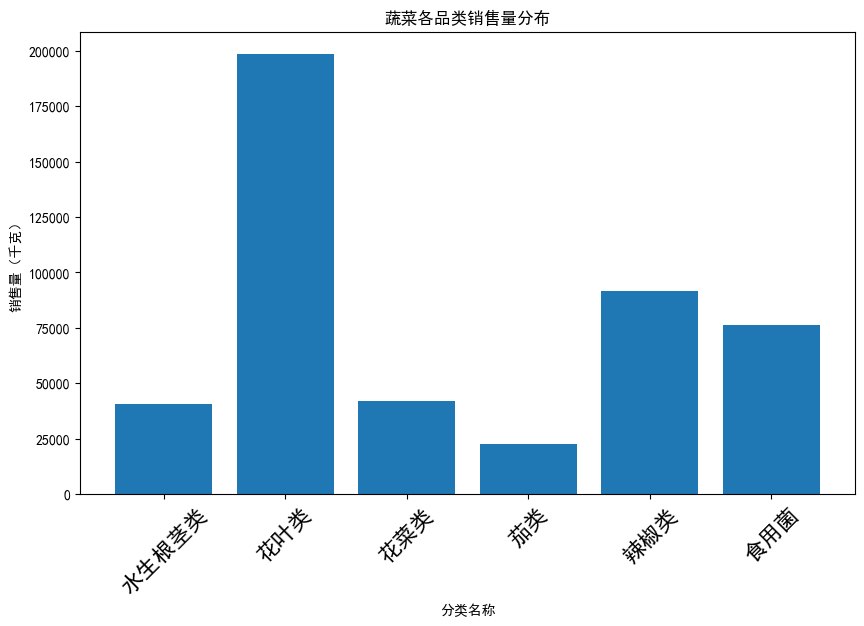

In [11]:
# 设置图形的大小为10x6英寸
plt.figure(figsize=(10, 6))

# 绘制柱状图
plt.bar(sales_by_Catagory.index, sales_by_Catagory.values)

# 设置x轴标签的字体样式，并将标签旋转45度
plt.xticks(rotation=45, size=16)

# 设置x轴标签的文字内容以及字体样式
plt.xlabel('分类名称')

# 设置y轴标签的文字内容以及字体样式
plt.ylabel('销售量（千克）')

# 设置图形的标题以及字体样式
plt.title('蔬菜各品类销售量分布')

# 保存图形为PNG格式文件，设定dpi为300以获得更高的分辨率，并通过bbox_inches='tight'参数确保保存整个图形
plt.savefig('./results/品类销量图.png', dpi=300, bbox_inches='tight')